In [1]:
#Importing the necessary modules for the 
import keras
import scipy
import numpy
import cv2

Using TensorFlow backend.


In [2]:
## This function builds the VGG16 architecture as a Keras Sequential Model and returns it
def vgg16_model():
    model = keras.models.Sequential()
    
    ##Block 1 layers
    model.add(keras.layers.Conv2D(64,(3,3),activation='relu',padding='same',name='block1_conv1',input_shape=[224,224,3]))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))
    
    ##Block 2 Layers
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1'))
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))
    
    #Block 3 Layers
    model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1'))
    model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2'))
    model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))
    
    #Block 4 Layers
    model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1'))
    model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2'))
    model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))
    
    #Block 5 Layers
    model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1'))
    model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2'))
    model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))
    
    model.add(keras.layers.Flatten(name='flatten'))
    
    #Fully connected block
    model.add(keras.layers.Dense(4096, activation='relu', name='fc1'))
    ##IMP: THE FOLLOWING LAYER IS THE INTERMEDIATE LAYER OF INTEREST
    ## IMAGE FEATURE VECTOR IS USED AS THE OUTPUT OF THIS LAYER
    model.add(keras.layers.Dense(4096, activation='relu', name='fc2'))
    
    model.add(keras.layers.Dense(1000, activation='softmax', name='predictions'))
    return model

In [3]:
def vgg19_model():
    model = keras.models.Sequential()
    
    ##Block 1 layers
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1',input_shape=[224,224,3]))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))
    
    ##Block 2 layers
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1'))
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))
    
    ##Block 3 layers
    model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1'))
    model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2'))
    model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3'))
    model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv4'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

    ##Block 4 layers
    model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1'))
    model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2'))
    model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3'))
    model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv4'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

    ##Block 5 layers
    model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1'))
    model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2'))
    model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3'))
    model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv4'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))
    
    model.add(keras.layers.Flatten(name='flatten'))

    #Fully connected block
    model.add(keras.layers.Dense(4096, activation='relu', name='fc1'))
    model.add(keras.layers.Dense(4096, activation='relu', name='fc2'))
    model.add(keras.layers.Dense(1000, activation='softmax', name='predictions'))
    return model

In [4]:
vgg16Model = vgg16_model()

In [5]:
vgg16Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

### This cell loads the pretrained weights of the VGG 16 model into the set

In [6]:
import h5py
vgg16Model.load_weights('vgg16_weights_tf_dim_ordering_tf_kernels.h5')

In [7]:
vgg16Model.get_weights()

[array([[[[  4.29470569e-01,   1.17273867e-01,   3.40129584e-02, ...,
            -1.32241577e-01,  -5.33475243e-02,   7.57738389e-03],
          [  5.50379455e-01,   2.08774377e-02,   9.88311544e-02, ...,
            -8.48205537e-02,  -5.11389151e-02,   3.74943428e-02],
          [  4.80015397e-01,  -1.72696680e-01,   3.75577137e-02, ...,
            -1.27135560e-01,  -5.02991639e-02,   3.48965675e-02]],
 
         [[  3.73466998e-01,   1.62062630e-01,   1.70863140e-03, ...,
            -1.48207128e-01,  -2.35300660e-01,  -6.30356818e-02],
          [  4.40074533e-01,   4.73412387e-02,   5.13819456e-02, ...,
            -9.88498852e-02,  -2.96195745e-01,  -7.04357103e-02],
          [  4.08547401e-01,  -1.70375049e-01,  -4.96297423e-03, ...,
            -1.22360572e-01,  -2.76450396e-01,  -3.90796512e-02]],
 
         [[ -6.13601133e-02,   1.35693997e-01,  -1.15694344e-01, ...,
            -1.40158370e-01,  -3.77666801e-01,  -3.00509870e-01],
          [ -8.13870355e-02,   4.18543853e

In [8]:
import matplotlib.image as mpimg

In [9]:
laskaImage = mpimg.imread('laska.png')

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

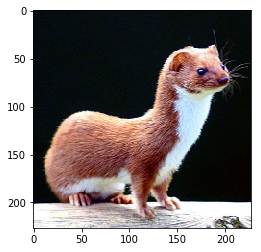

In [11]:
plt.imshow(laskaImage)

In [12]:
laskaImage

array([[[ 0.01960784,  0.03529412,  0.07058824,  1.        ],
        [ 0.01960784,  0.03921569,  0.0627451 ,  1.        ],
        [ 0.02745098,  0.04705882,  0.07058824,  1.        ],
        ..., 
        [ 0.01960784,  0.05490196,  0.0627451 ,  1.        ],
        [ 0.01568628,  0.04705882,  0.05882353,  1.        ],
        [ 0.01568628,  0.04313726,  0.05490196,  1.        ]],

       [[ 0.01960784,  0.03529412,  0.07058824,  1.        ],
        [ 0.03137255,  0.05098039,  0.07450981,  1.        ],
        [ 0.02352941,  0.04313726,  0.06666667,  1.        ],
        ..., 
        [ 0.01568628,  0.04313726,  0.05490196,  1.        ],
        [ 0.01176471,  0.04313726,  0.05490196,  1.        ],
        [ 0.01568628,  0.04313726,  0.05490196,  1.        ]],

       [[ 0.01960784,  0.03529412,  0.07058824,  1.        ],
        [ 0.01176471,  0.03137255,  0.05490196,  1.        ],
        [ 0.00784314,  0.02745098,  0.05098039,  1.        ],
        ..., 
        [ 0.01568628,  0

In [13]:
laskaCvImage = cv2.imread('laska.png')

In [14]:
from imagenet_classes import class_names

In [15]:
class_names

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio camelus',
 'brambling, Fringilla montifringilla',
 'goldfinch, Carduelis carduelis',
 'house finch, linnet, Carpodacus mexicanus',
 'junco, snowbird',
 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 'robin, American robin, Turdus migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel, dipper',
 'kite',
 'bald eagle, American eagle, Haliaeetus leucocephalus',
 'vulture',
 'great grey owl, great gray owl, Strix nebulosa',
 'European fire salamander, Salamandra salamandra',
 'common newt, Triturus vulgaris',
 'eft',
 'spotted salamander, Ambystoma maculatum',
 'axolotl, mud puppy, Ambystoma mexicanum',
 'bullfrog, Rana catesbeiana',
 'tree frog, tree-f

In [16]:
len(class_names)

1000

In [17]:
laskaResized = cv2.resize(laskaCvImage,(224,224))

In [18]:
laskaResized.shape

(224, 224, 3)

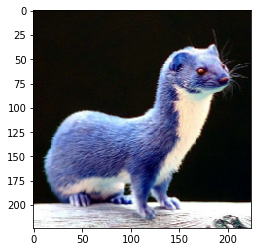

In [19]:
plt.imshow(laskaResized)

In [20]:
vgg16_predictions = vgg16Model.predict(laskaResized.reshape(1,224,224,3))
laska_top_ten_preds = numpy.squeeze(numpy.argsort(vgg16_predictions))[-10:] 
laska_top_ten_probs = numpy.squeeze(numpy.sort(vgg16_predictions))[-10:]
for i in range(9,-1,-1):
    print (class_names[laska_top_ten_preds[i]] + "\t" + str(laska_top_ten_probs[i]) + "\n\n")

weasel	0.887353


mink	0.0558085


polecat, fitch, foulmart, foumart, Mustela putorius	0.0558053


black-footed ferret, ferret, Mustela nigripes	0.00101856


mongoose	7.82805e-06


otter	6.24715e-06


fox squirrel, eastern fox squirrel, Sciurus niger	8.65319e-07


mousetrap	2.35241e-08


marmot	2.34856e-08


Arctic fox, white fox, Alopex lagopus	1.45055e-08




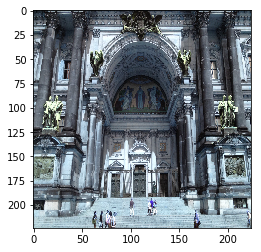

In [21]:
berlin = cv2.imread('C:/Users/avi27/Desktop/Datasets/berlin/01.jpg')
berlinResized = cv2.resize(berlin,(224,224))
plt.imshow(berlinResized)

In [22]:
berlinResized.shape

(224, 224, 3)

In [23]:
vgg16_predictions = vgg16Model.predict(berlinResized.reshape(1,224,224,3))
berlin_top_ten_preds = numpy.squeeze(numpy.argsort(vgg16_predictions))[-10:] 
berlin_top_ten_probs = numpy.squeeze(numpy.sort(vgg16_predictions))[-10:]
for i in range(9,-1,-1):
    print (class_names[berlin_top_ten_preds[i]] + "\t" + str(berlin_top_ten_probs[i]) + "\n\n")

palace	0.572657


triumphal arch	0.199931


vault	0.0890454


altar	0.0631379


monastery	0.041224


church, church building	0.0287639


mosque	0.00107441


dome	0.00101037


throne	0.000798449


obelisk	0.000625233




In [24]:
#Function to return a given intermediate layer output of any image of a given model
def get_intermediate_output(cvImage,model,layer_name):
    intermediate_layer_model = keras.Model(inputs=model.input,outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(cvImage.reshape(1,224,224,3))
    return numpy.squeeze(intermediate_output)

In [25]:
laskaVector = get_intermediate_output(laskaResized,vgg16Model,'fc2')
numpy.count_nonzero(laskaVector)

630

In [26]:
laskaVector[laskaVector != 0]

array([  9.71360207e-01,   7.60111392e-01,   2.17406273e+00,
         1.07741060e+01,   6.95615911e+00,   5.28047323e+00,
         2.48970389e+00,   7.23227739e+00,   2.19845104e+00,
         1.33888113e+00,   5.10743856e+00,   4.77189875e+00,
         8.16504836e-01,   5.31811333e+00,   1.02018845e+00,
         2.81244576e-01,   2.97344446e+00,   5.51892424e+00,
         5.99509835e-01,   2.31498718e+00,   9.10791492e+00,
         6.39229774e+00,   8.93557835e+00,   6.09355354e+00,
         4.01762295e+00,   3.85543942e+00,   7.23787737e+00,
         1.40421379e+00,   5.64814138e+00,   1.68356502e+00,
         3.24361873e+00,   6.24298143e+00,   2.20580244e+00,
         2.44963646e+00,   1.63841844e+00,   7.16087675e+00,
         1.55307722e+00,   2.10280752e+00,   1.48011618e+01,
         1.23678312e+01,   6.69879794e-01,   3.17062664e+00,
         1.75197124e+00,   1.24751616e+00,   5.70118070e-01,
         2.06860828e+01,   4.92656708e+00,   1.51143045e+01,
         9.59650040e+00,

In [27]:
berlinVector = get_intermediate_output(berlinResized,vgg16Model,'fc2')
numpy.count_nonzero(berlinVector)

760

In [28]:
berlinVector[berlinVector != 0]

array([  9.66501617e+00,   5.98062849e+00,   3.09267807e+00,
         4.09697390e+00,   1.26594579e+00,   4.44656610e-03,
         2.88326335e+00,   2.13663280e-01,   4.81068563e+00,
         1.48620164e+00,   1.20977764e+01,   4.21740770e+00,
         5.23353720e+00,   1.28046215e-01,   4.44897145e-01,
         2.64279008e+00,   5.07588100e+00,   1.18263638e+00,
         6.63171768e+00,   1.14050207e+01,   6.83410287e-01,
         3.61648393e+00,   2.95949960e+00,   4.51674271e+00,
         3.07261515e+00,   2.16099429e+00,   2.00530797e-01,
         8.20281029e+00,   1.03970556e+01,   7.38042414e-01,
         2.29120517e+00,   1.14211977e+00,   8.94220829e-01,
         1.05676174e+01,   1.36070919e+00,   1.55834818e+00,
         6.70787334e+00,   3.23062688e-01,   3.98506165e+00,
         1.74191034e+00,   8.46102619e+00,   2.32451439e-01,
         3.81475306e+00,   6.65444553e-01,   1.85524702e-01,
         1.62010241e+00,   6.93485928e+00,   2.65847206e+00,
         3.57327795e+00,

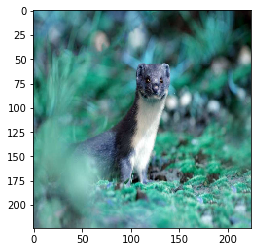

In [30]:
weasel2 = cv2.imread('weasel2.png')
weasel2Resized = cv2.resize(weasel2,(224,224))
plt.imshow(weasel2Resized)

In [31]:
vgg16_predictions = vgg16Model.predict(weasel2Resized.reshape(1,224,224,3))
weasel2_top_ten_preds = numpy.squeeze(numpy.argsort(vgg16_predictions))[-10:] 
weasel2_top_ten_probs = numpy.squeeze(numpy.sort(vgg16_predictions))[-10:]
for i in range(9,-1,-1):
    print (class_names[weasel2_top_ten_preds[i]] + "\t" + str(weasel2_top_ten_probs[i]) + "\n\n")

weasel	0.958156


mink	0.0393635


polecat, fitch, foulmart, foumart, Mustela putorius	0.00226788


black-footed ferret, ferret, Mustela nigripes	0.000116728


mongoose	5.25354e-05


fox squirrel, eastern fox squirrel, Sciurus niger	2.80089e-05


Arctic fox, white fox, Alopex lagopus	8.86824e-06


otter	2.45275e-06


marmot	1.71949e-06


skunk, polecat, wood pussy	6.3352e-07




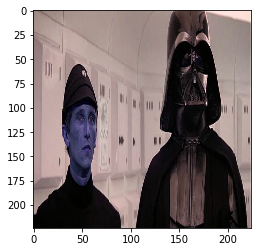

In [32]:
vader = cv2.imread('starwars.png')
vaderResized = cv2.resize(vader,(224,224))
plt.imshow(vaderResized)

In [33]:
vgg16_predictions = vgg16Model.predict(vaderResized.reshape(1,224,224,3))
vader_top_ten_preds = numpy.squeeze(numpy.argsort(vgg16_predictions))[-10:] 
vader_top_ten_probs = numpy.squeeze(numpy.sort(vgg16_predictions))[-10:]
for i in range(9,-1,-1):
    print (class_names[vader_top_ten_preds[i]] + "\t" + str(vader_top_ten_probs[i]) + "\n\n")

cloak	0.295118


abaya	0.20545


lab coat, laboratory coat	0.084245


sweatshirt	0.0441839


picket fence, paling	0.0362145


spatula	0.0321646


iron, smoothing iron	0.0278677


suit, suit of clothes	0.0258365


trench coat	0.0202855


Windsor tie	0.0180161




In [34]:
vaderVector = get_intermediate_output(vaderResized,vgg16Model,'fc2')
numpy.count_nonzero(vaderVector)

1532

In [35]:
vaderVector[vaderVector != 0]

array([ 0.73430264,  1.63421607,  2.29881096, ...,  4.92931175,
        0.74165428,  2.55734777], dtype=float32)